<a href="https://colab.research.google.com/github/acapodanno/Machine-Learning-per-AI-Solution-Architect/blob/main/linear_regression_final_exersice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd

url = "https://raw.githubusercontent.com/ProfAI/machine-learning-fondamenti/main/datasets/housing.csv"
df = pd.read_csv(url,index_col=0)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 1. Matrix Correlation

In [78]:
!pip install seaborn

In [79]:
!pip install matplotlib

In [80]:
correlation_df = df.corr()
correlation_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


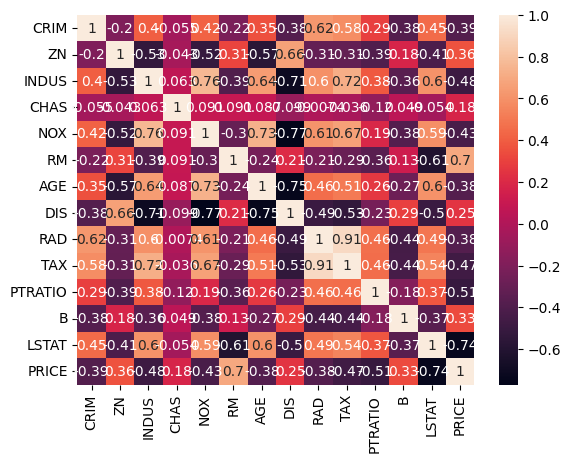

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

axis_corr=sns.heatmap(correlation_df, annot=True)
plt.show()

###2.

In [82]:
x_train = df['LSTAT'].values
y_train = df['PRICE'].values



In [83]:
!pip install scikit-learn

In [84]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
def evaluate(lr,data):
  x,y=data
  y_pred = lr.predict(x.reshape(-1,1))
  return y_pred

lr = LinearRegression()
lr.fit(x_train.reshape(-1,1),y_train)
evaluate(lr,(x_train,y_train))


array([29.8225951 , 25.87038979, 30.72514198, 31.76069578, 29.49007782,
       29.60408375, 22.74472741, 16.36039575,  6.11886372, 18.30799693,
       15.1253316 , 21.94668596, 19.62856553, 26.70643322, 24.80633451,
       26.50692285, 28.30251613, 20.61661686, 23.44776393, 23.83728417,
       14.58380346, 21.41465832, 16.76891698, 15.66685973, 19.06803641,
       18.86852605, 20.48360995, 18.13698805, 22.39320915, 23.17224962,
       13.08272548, 22.16519731,  8.22797329, 17.12043524, 15.22983702,
       25.35736314, 23.71377775, 26.22190805, 24.92984093, 30.44962767,
       32.67274316, 29.95560201, 29.03405413, 27.48547369, 25.48086955,
       24.85383698, 21.11064252, 16.69291303,  5.28282029, 19.16304135,
       21.77567707, 25.59487547, 29.53758029, 26.54492483, 20.49311044,
       29.98410349, 29.07205611, 30.80114593, 28.03650231, 25.79438584,
       22.06069188, 20.83512821, 28.16000873, 25.52837202, 26.90594358,
       30.1171104 , 24.8253355 , 26.85844111, 22.11769484, 26.20

In [85]:
print("r2 score=",r2_score(y_train,evaluate(lr,(x_train,y_train)))*100,"%")


r2 score= 54.41462975864797 %


In [86]:
from sklearn.model_selection import train_test_split

X = df['LSTAT'].values
y = df['PRICE'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

def evaluate(lr,data):
  x,y=data
  y_pred = lr.predict(x.reshape(-1,1))
  return y_pred

lr = LinearRegression()
lr.fit(X_train.reshape(-1,1),y_train)
evaluate(lr,(X_train,y_train))

array([17.54608394, 20.7034131 , 16.44788249, 22.13499713, 23.1939771 ,
       26.62585662, 30.72450131, 21.14465475, 20.15431238, 24.97855445,
       29.99890392, 32.41102496, 27.64561511,  6.50523724,  1.13189445,
       11.14317728, 17.96771485, 31.14613222, 25.70415183, 18.12460077,
        1.48488777, 31.56776313, 27.28281641, 21.31134604, 24.34120539,
       20.41905737, 19.19338611,  8.9761905 , 30.29306502, 28.7928434 ,
       19.97781571, 20.49750033,  7.96623738, 27.22398419, 23.34105765,
       25.48843369, 28.43004471, 27.86133325, 25.89045386, 25.60609813,
       31.96978331, 30.75391742, 30.07734688, 28.57712526, 29.36155487,
       17.44803024, 31.75406516, 21.88005751, 27.52795067, 26.72391032,
       25.00797056, 22.21344009, 15.83994955, 31.3814611 , 28.1064675 ,
       30.58722613,  7.49557962, 16.90873488, 24.03723892, 31.22457518,
       17.12445302, 32.02861553, 25.27271555, 28.22413194, 11.99624448,
       26.18461497, 25.26291018, 29.63610523, 20.72302384, 23.03

In [88]:
print("r2 score=",r2_score(y_train,evaluate(lr,(X_train,y_train)))*100,"%")


r2 score= 56.08204549102924 %
